In [1]:
# Importing necessary libraries
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and CSV file I/O operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhanced data visualization support
import os  # For operating system dependent functionality

# Listing all files in the input directory in a Kaggle environment
# Useful to understand the structure of the dataset directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-transaction-data/online_retail.csv


In [12]:
# Import necessary libraries
import missingno as msno

# Load the dataset
df = pd.read_csv('/kaggle/input/online-retail-transaction-data/online_retail.csv')
# Display the first few rows of the dataframe
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
#데이터 타입과 구조
print("data structure is:",df.shape)
print("data type is:", df.dtypes)
print("data column is:",df.columns)

data structure is: (541909, 9)
data type is: index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object
data column is: Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [7]:
df.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

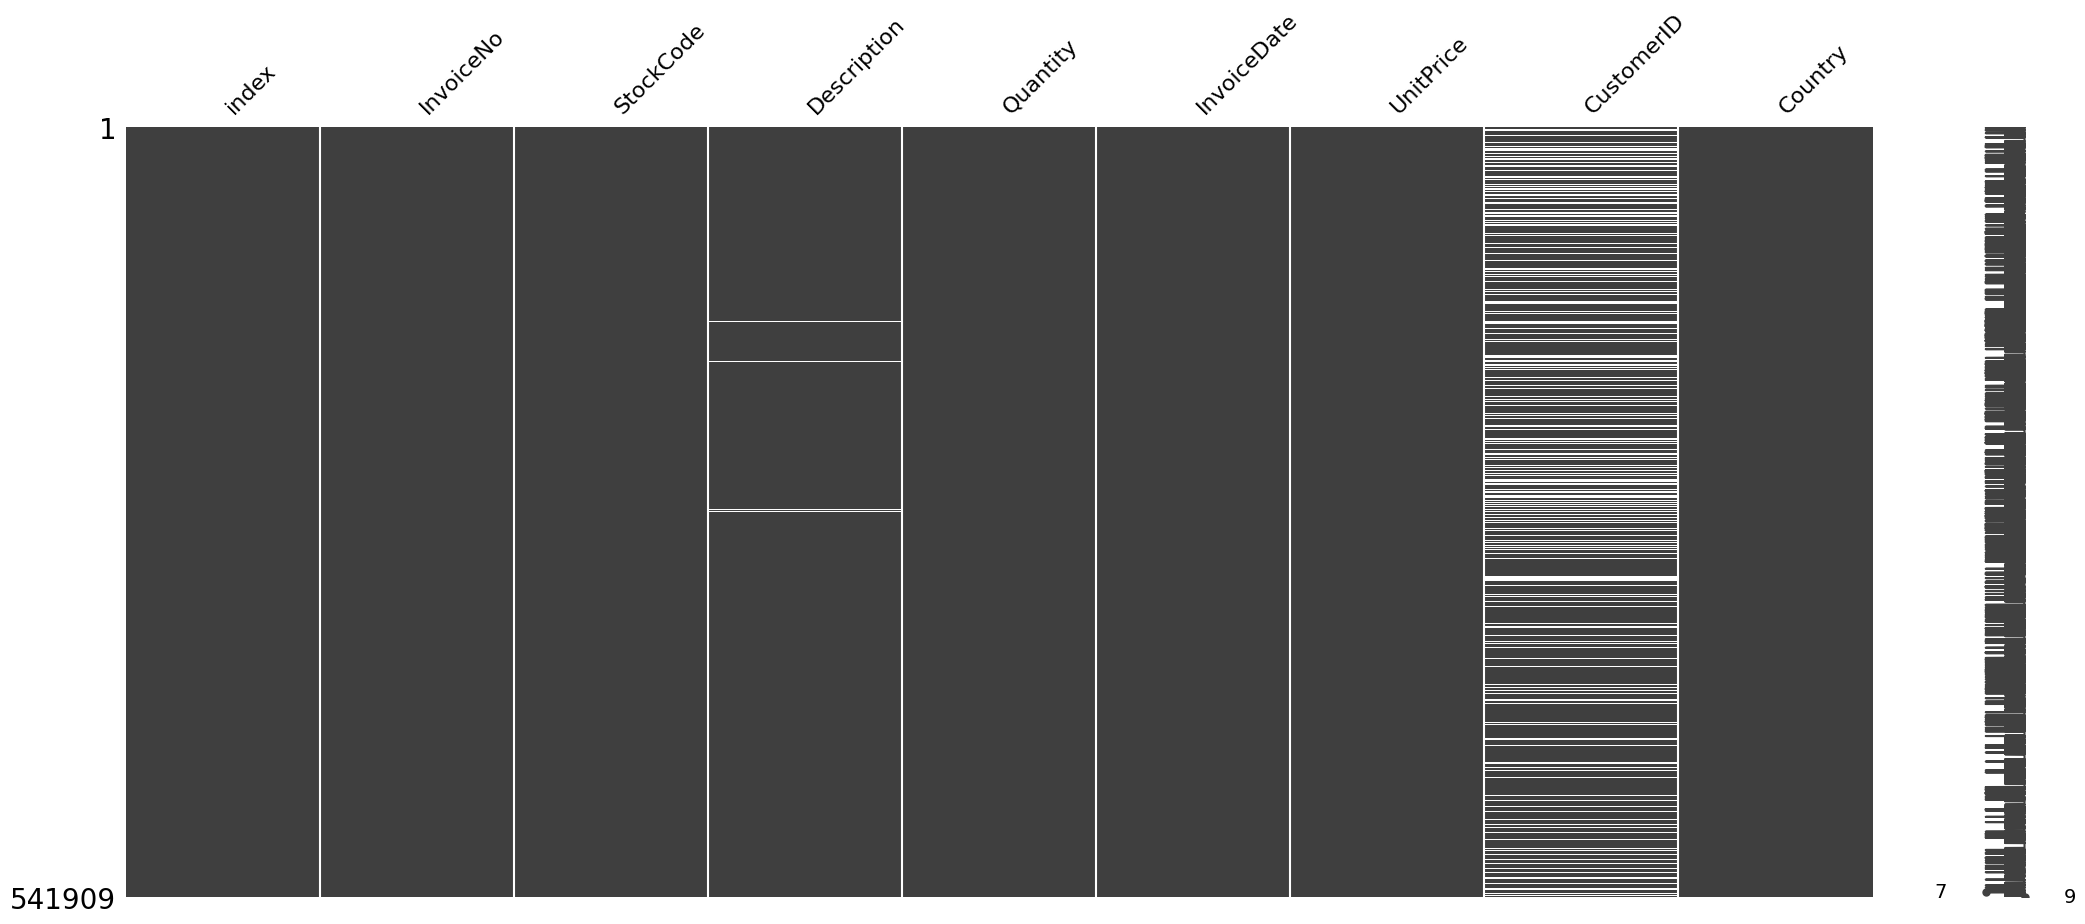

In [10]:
msno.matrix(df)
plt.show()

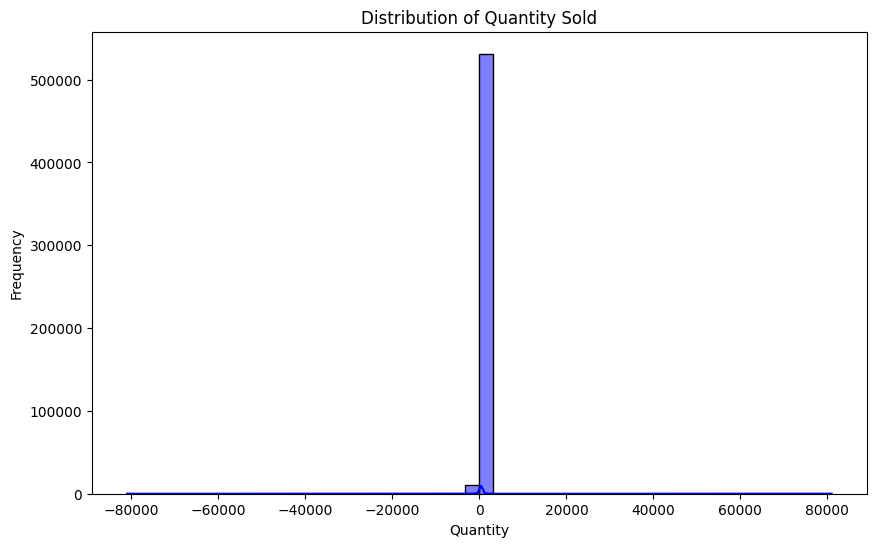

In [54]:
# Visualizing the distribution of 'Quantity' sold
# A histogram is used to understand the frequency of different quantity values
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

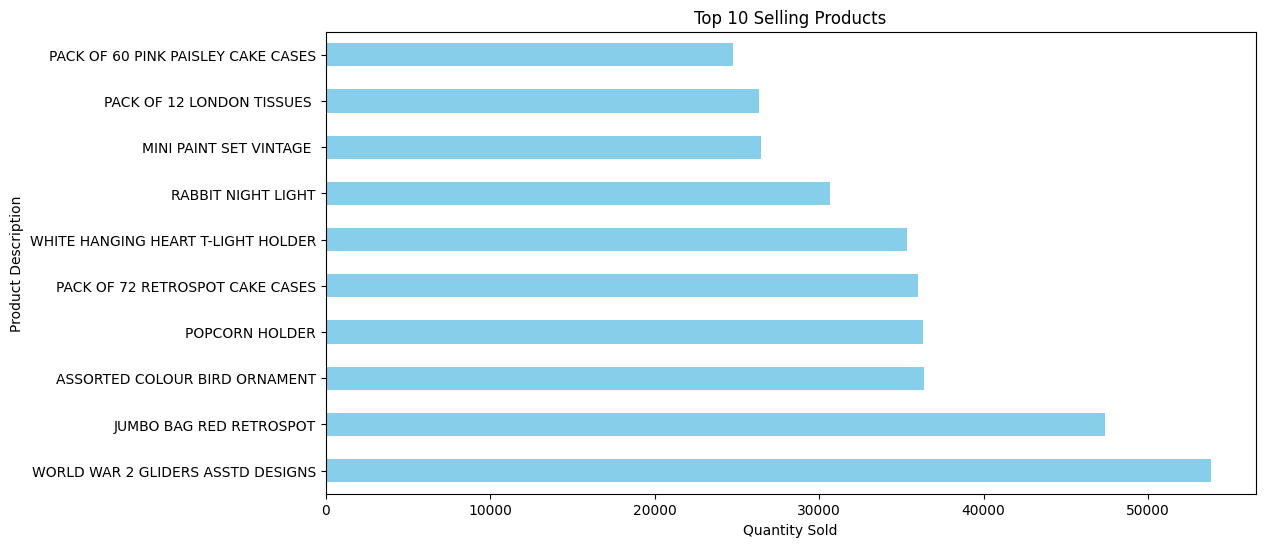

In [55]:
# Identifying the top 10 products by quantity sold
# The 'Description' column is used to identify products, and the sum of 'Quantity' is used to rank them
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualizing the top 10 selling products using a horizontal bar chart
plt.figure(figsize=(12, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

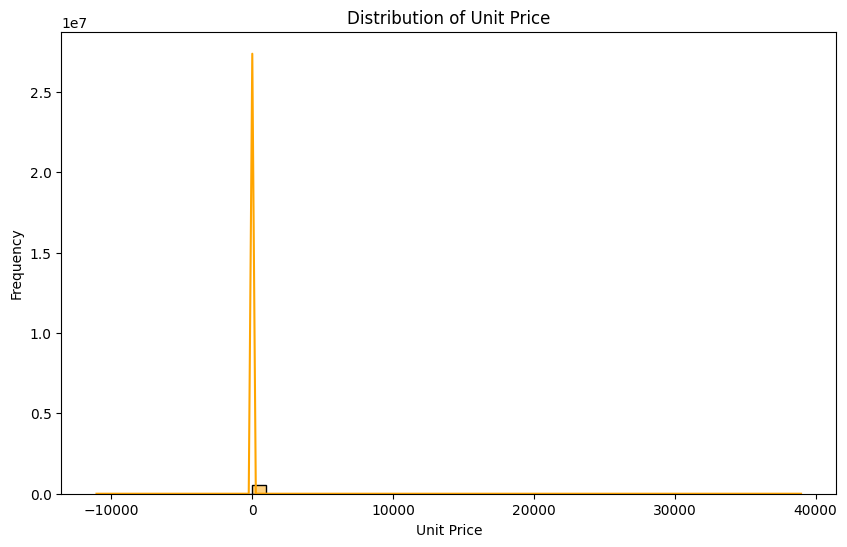

In [56]:
# Visualizing the distribution of 'UnitPrice'
# A histogram is used to understand the frequency of different unit price values
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='orange')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

In [58]:
# Converting 'InvoiceDate' from string to datetime format
# This allows for time-series analysis later on
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Creating a new column 'TotalCost' as a product of 'Quantity' and 'UnitPrice'
# This represents the total sales for each transaction
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

# Calculating monthly revenue trend
# The data is resampled by month, and the sum of 'TotalCost' is calculated for each month
monthly_revenue = df.resample('M', on='InvoiceDate')['TotalCost'].sum()


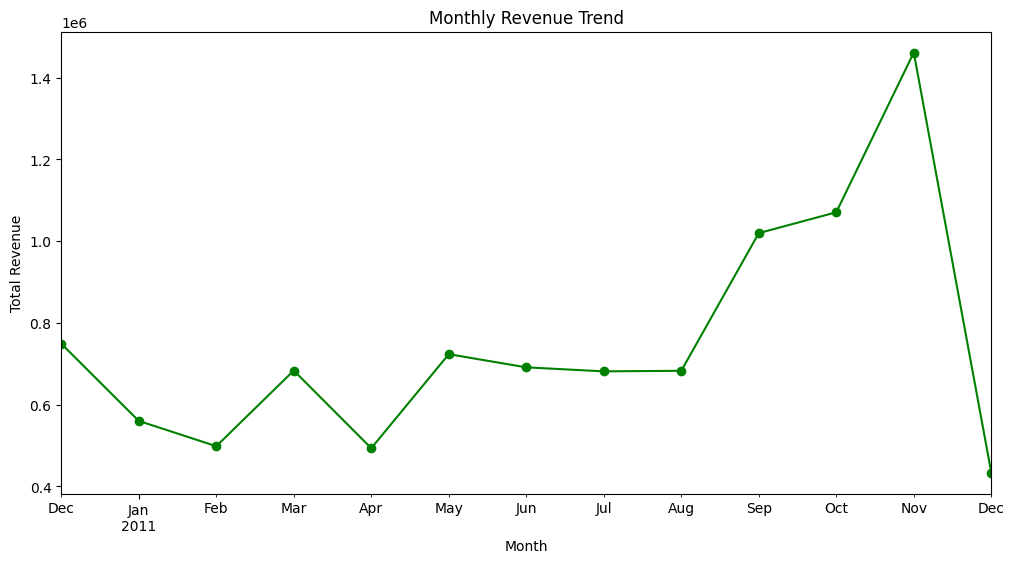

In [59]:
# Visualizing monthly revenue trend using a line chart
# Each point on the line chart represents total revenue for a month
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

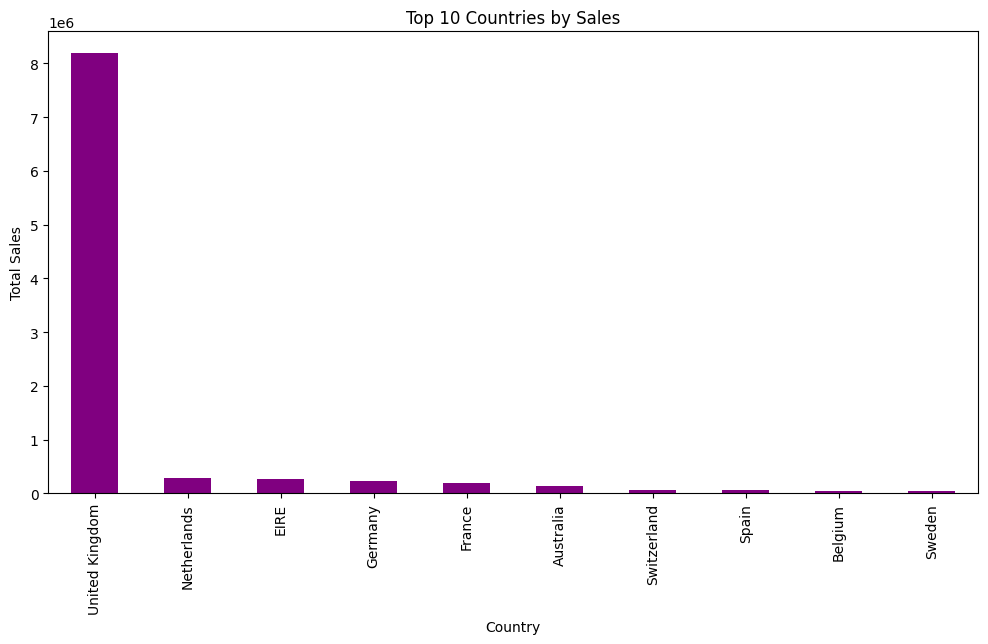

In [61]:
# Identifying the top 10 countries by total sales
# The 'Country' column is used to group the data, and the sum of 'TotalCost' is used to rank countries
top_countries = df.groupby('Country')['TotalCost'].sum().sort_values(ascending=False).head(10)

# Visualizing the top 10 countries by sales using a bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

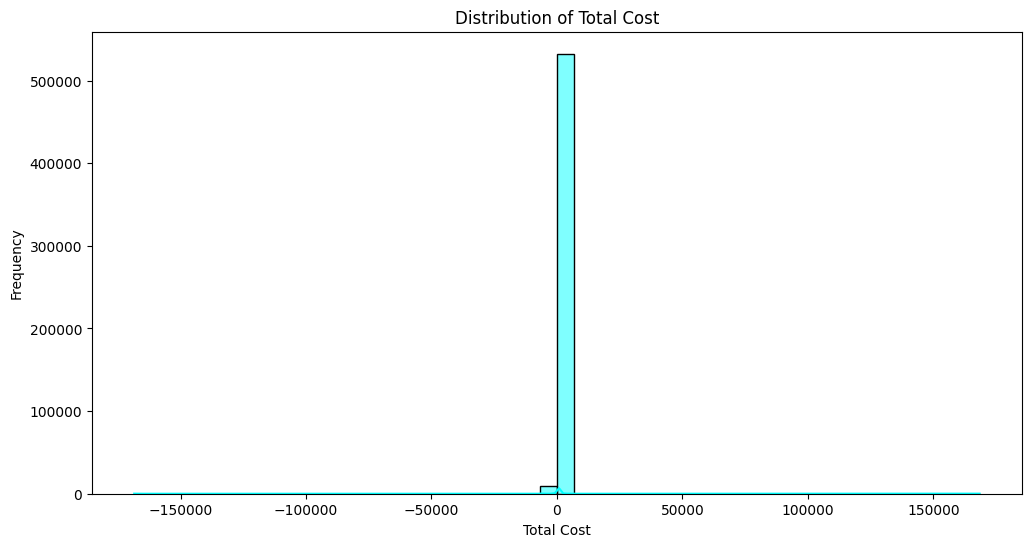

In [62]:
# Visualizing the distribution of 'TotalCost'
# A histogram is used to understand the frequency of different total cost values
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalCost'], bins=50, kde=True, color='cyan')
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()


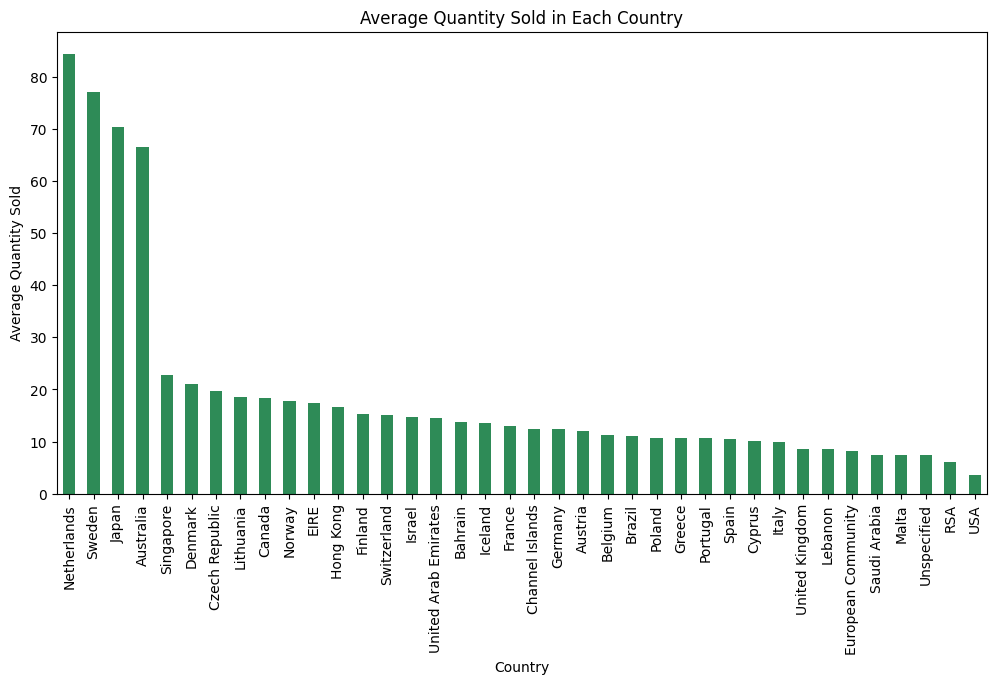

In [63]:
# Calculate the average quantity sold per country
# The 'Quantity' column is grouped by 'Country', and the mean quantity is calculated for each country.
avg_quantity_by_country = df.groupby('Country')['Quantity'].mean().sort_values(ascending=False)

# Visualize the average quantity sold per country using a bar chart
# Each bar represents the average quantity of products sold in a particular country.
plt.figure(figsize=(12, 6))
avg_quantity_by_country.plot(kind='bar', color='seagreen')
plt.title('Average Quantity Sold in Each Country')
plt.xlabel('Country')
plt.ylabel('Average Quantity Sold')
plt.show()

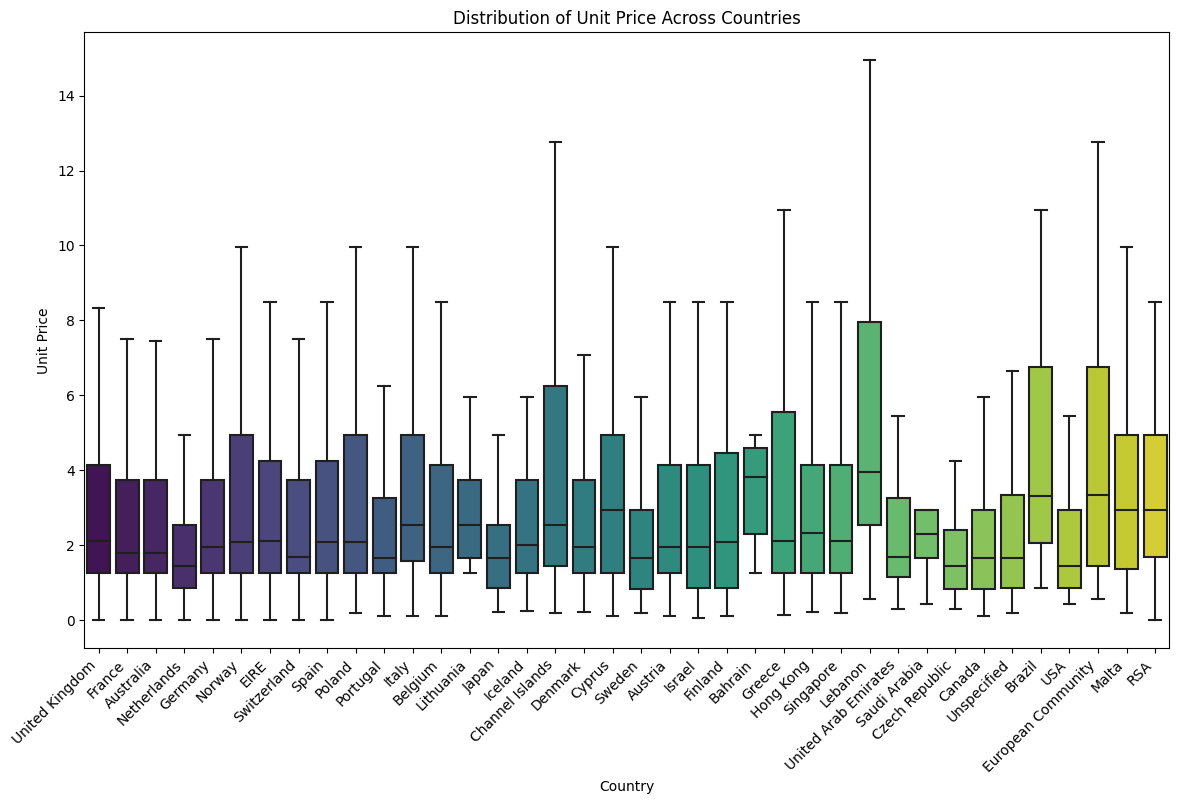

In [64]:
# Visualize the distribution of unit price across countries using a boxplot
# The 'UnitPrice' distribution is shown for each country, excluding outliers for better clarity.
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='UnitPrice', data=df, showfliers=False, palette='viridis')
plt.title('Distribution of Unit Price Across Countries')
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<Figure size 1400x800 with 0 Axes>

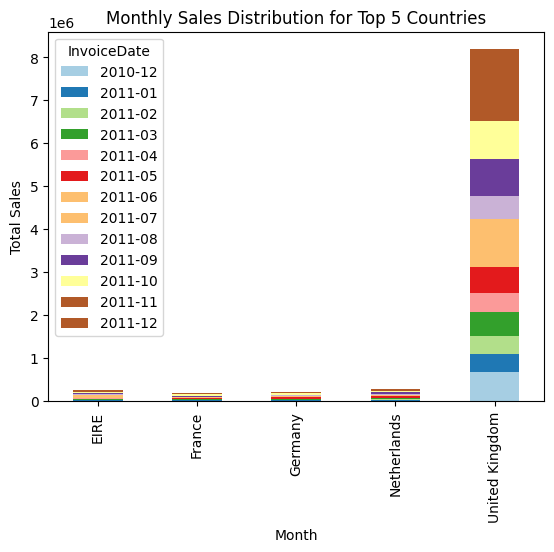

In [65]:
# Filtering the top 5 countries with the highest sales
# It groups the data by 'Country', calculates the sum of 'TotalCost' for each country,
# sorts the countries by this total sales value in descending order, and then selects the top 5.
top_countries = df.groupby('Country')['TotalCost'].sum().sort_values(ascending=False).head(5).index
df_top_countries = df[df['Country'].isin(top_countries)]

# Calculating the monthly sales distribution for the top 5 countries
# It groups the filtered top countries' data first by 'Country', then by month of 'InvoiceDate',
# calculates the sum of 'TotalCost' for each group, and reshapes the result so that each country's
# sales are displayed as separate columns with months as the row index.
monthly_distribution_top_countries = df_top_countries.groupby(['Country', df_top_countries['InvoiceDate'].dt.to_period("M")])['TotalCost'].sum().unstack()

# Visualizing the monthly sales distribution for the top 5 countries
# It creates a stacked bar chart showing each country's total sales per month.
# This visualization helps in comparing monthly sales trends across the top countries.
plt.figure(figsize=(14, 8))
monthly_distribution_top_countries.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Monthly Sales Distribution for Top 5 Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

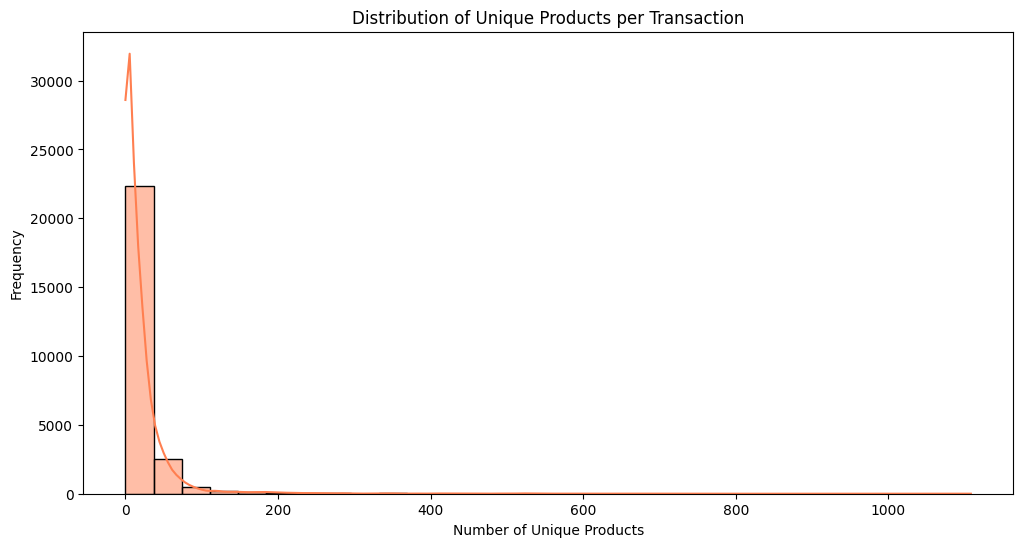

In [66]:
# Calculating the number of unique products per transaction
# It groups the data by 'InvoiceNo', then counts the unique 'Description' values for each group
unique_products_per_transaction = df.groupby('InvoiceNo')['Description'].nunique()

# Visualizing the distribution of unique products per transaction
# A histogram is used to understand the frequency of different counts of unique products in transactions
plt.figure(figsize=(12, 6))
sns.histplot(unique_products_per_transaction, bins=30, kde=True, color='coral')
plt.title('Distribution of Unique Products per Transaction')
plt.xlabel('Number of Unique Products')
plt.ylabel('Frequency')
plt.show()


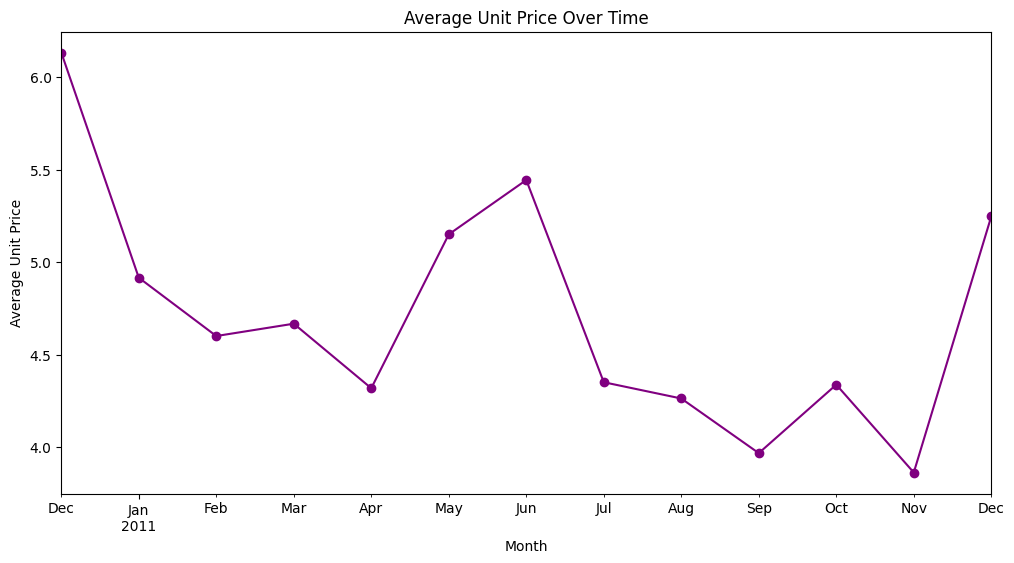

In [67]:
# Calculating the average unit price over time
# It groups the data by month of 'InvoiceDate', then calculates the mean 'UnitPrice' for each month
avg_unit_price_over_time = df.groupby(df['InvoiceDate'].dt.to_period("M"))['UnitPrice'].mean()

# Visualizing the average unit price over time
# A line chart is used to track changes in the average unit price across different months
plt.figure(figsize=(12, 6))
avg_unit_price_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Average Unit Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Unit Price')
plt.show()

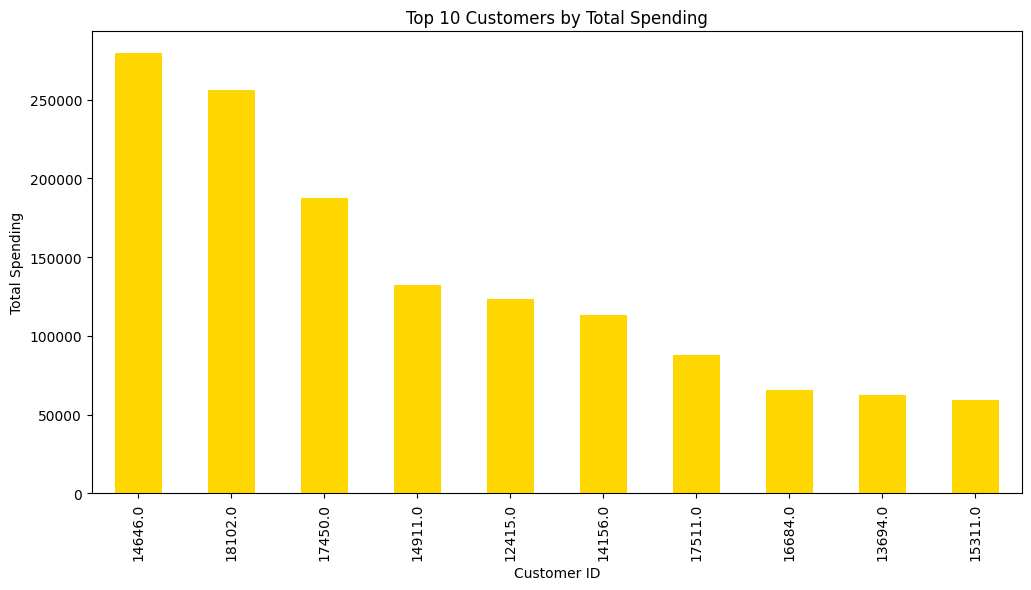

In [68]:
# Calculating the total spending of the top 10 customers
# It groups the data by 'CustomerID', then sums 'TotalCost' for each customer and sorts the totals
# to find the top 10 customers with the highest spending
top_customers = df.groupby('CustomerID')['TotalCost'].sum().sort_values(ascending=False).head(10)

# Visualizing the total spending of the top 10 customers
# A bar chart is used to display the total spending of each of the top 10 customers
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='gold')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()


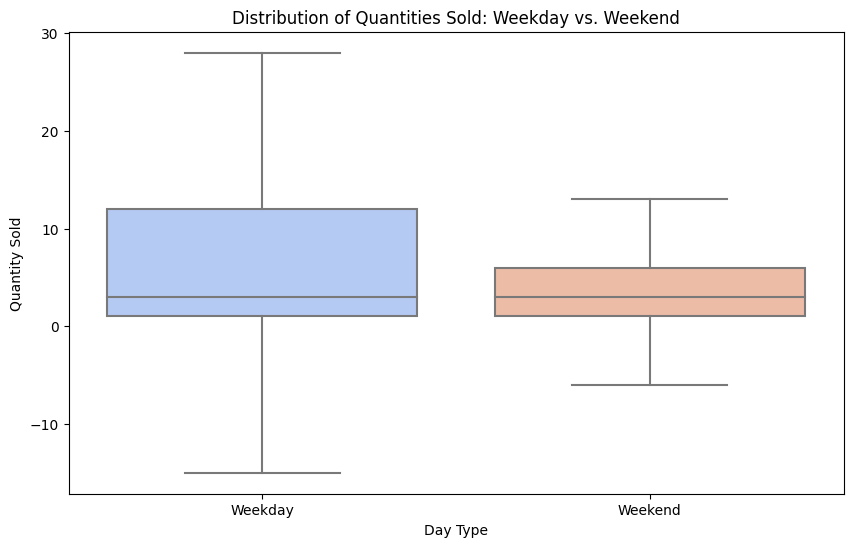

In [69]:
# Extracting day type (Weekday/Weekend) and creating a new column 'DayType'
# 'InvoiceDate' is used to determine the day of the week (0 to 6). Days 5 and 6 correspond to the weekend.
df['DayType'] = df['InvoiceDate'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Visualizing the distribution of quantities sold on weekdays vs weekends
# A boxplot shows the spread and central tendency of quantities sold for each day type category
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayType', y='Quantity', data=df, showfliers=False, palette='coolwarm')
plt.title('Distribution of Quantities Sold: Weekday vs. Weekend')
plt.xlabel('Day Type')
plt.ylabel('Quantity Sold')
plt.show()

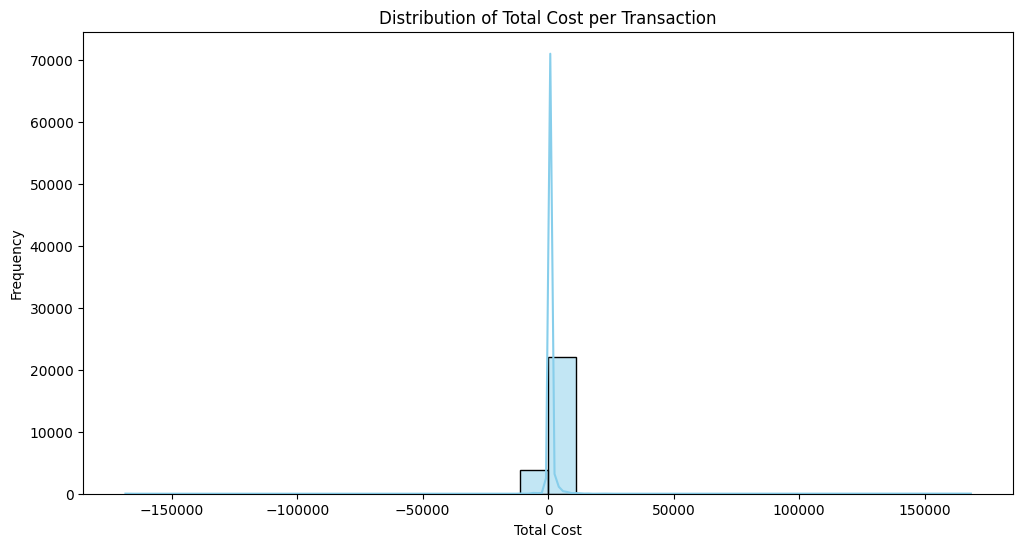

In [70]:
# Visualizing the distribution of total cost per transaction
# A histogram shows the frequency of different total cost values for all transactions
plt.figure(figsize=(12, 6))
sns.histplot(df.groupby('InvoiceNo')['TotalCost'].sum(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Cost per Transaction')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()


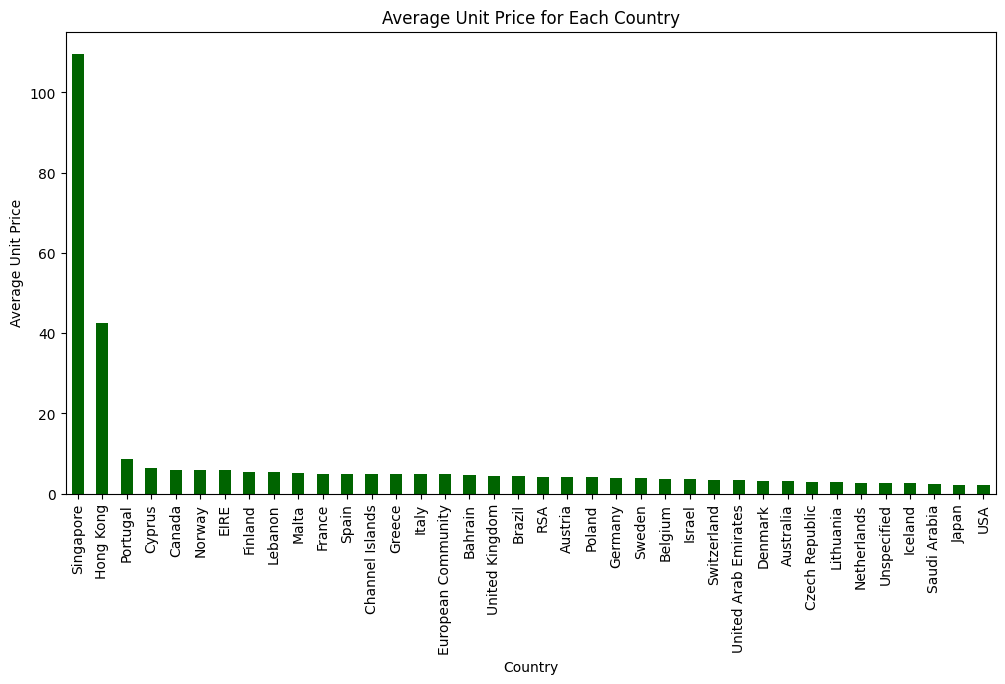

In [71]:
# Calculating the average unit price per country
# The mean 'UnitPrice' is calculated for each country and sorted in descending order to identify the countries with the highest and lowest average prices
avg_unit_price_by_country = df.groupby('Country')['UnitPrice'].mean().sort_values(ascending=False)

# Visualizing the average unit price per country using a bar chart
# Each bar represents the average unit price of products sold in a particular country
plt.figure(figsize=(12, 6))
avg_unit_price_by_country.plot(kind='bar', color='darkgreen')
plt.title('Average Unit Price for Each Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Price')
plt.show()

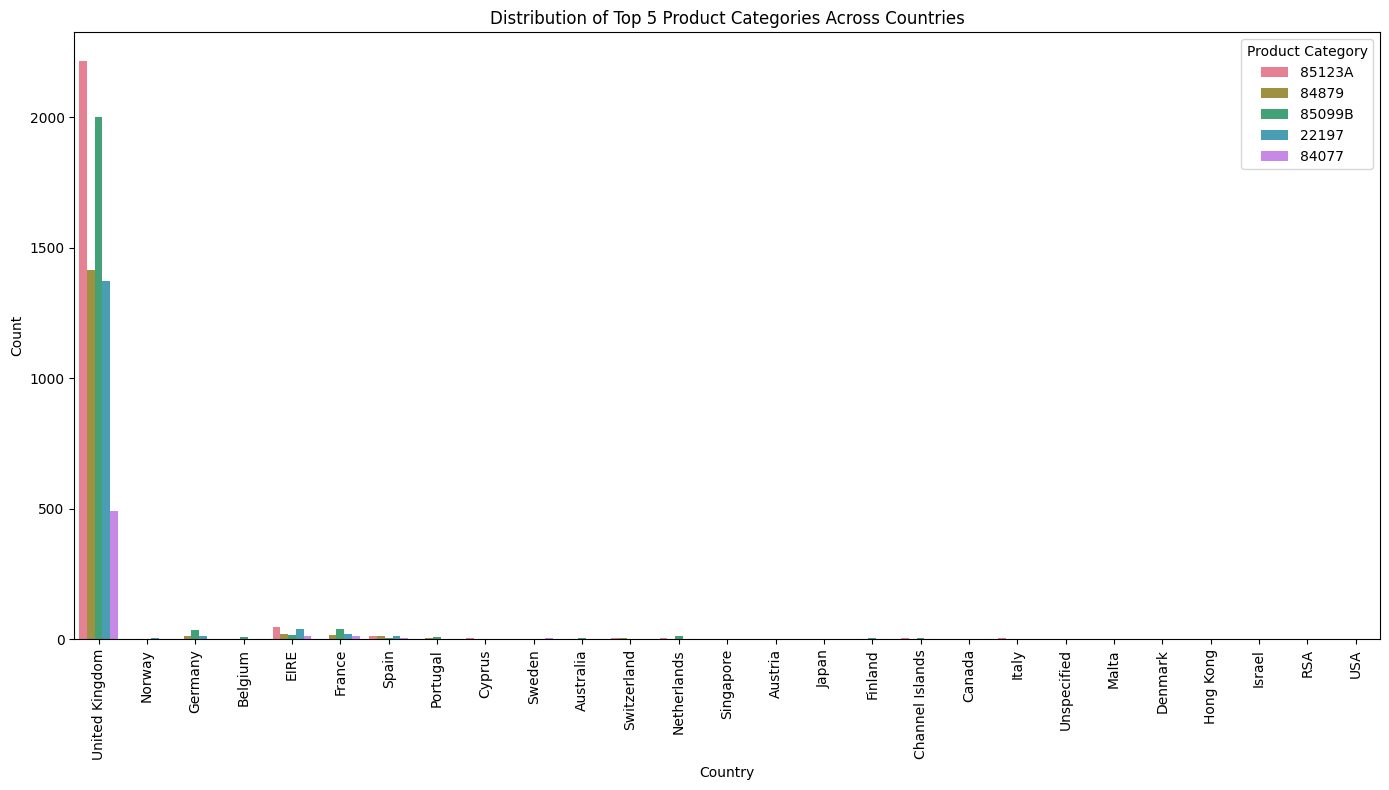

In [72]:
# Identifying the top 5 product categories with the highest sales volumes
# This is achieved by grouping the data by 'StockCode', summing the 'Quantity', and sorting in descending order
top_categories = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5).index
df_top_categories = df[df['StockCode'].isin(top_categories)]

# Visualizing the distribution of these top 5 product categories across different countries
# This provides insight into which countries have higher sales for these categories
plt.figure(figsize=(14, 8))
sns.countplot(x='Country', hue='StockCode', data=df_top_categories, palette='husl')
plt.title('Distribution of Top 5 Product Categories Across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Product Category')
plt.tight_layout()  # Adjusting the layout for better fit
plt.show()


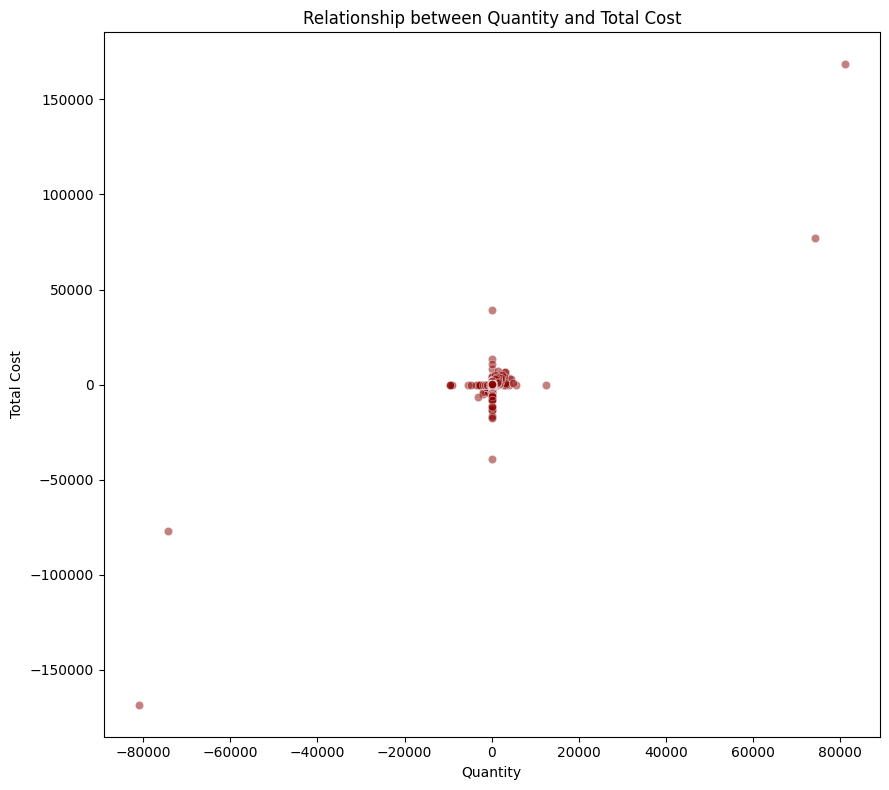

In [75]:
# Exploring the relationship between quantity and total cost for transactions
# This scatter plot helps understand how total cost varies with quantity - useful for spotting trends or outliers
plt.figure(figsize=(9, 8))
sns.scatterplot(x='Quantity', y='TotalCost', data=df, color='darkred', alpha=0.5)
plt.title('Relationship between Quantity and Total Cost')
plt.xlabel('Quantity')
plt.ylabel('Total Cost')
plt.tight_layout()  # Adjusting the layout
plt.show()

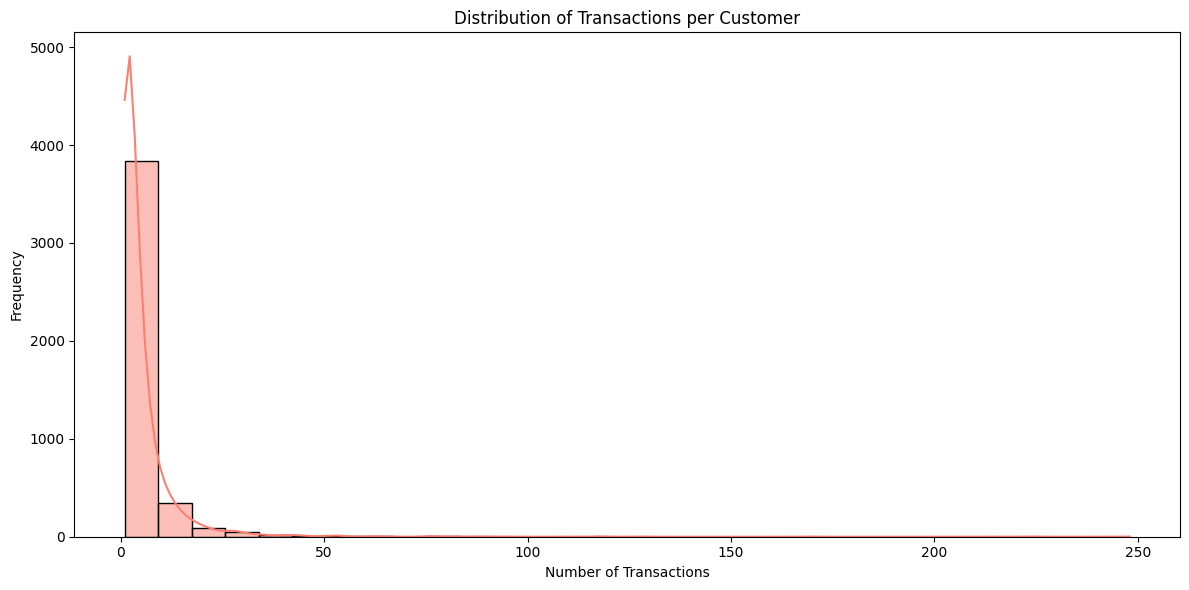

In [76]:
# Analyzing the distribution of transactions per customer to understand customer behavior
# This histogram shows how many transactions are typical per customer
transactions_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(12, 6))
sns.histplot(transactions_per_customer, bins=30, kde=True, color='salmon')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjusting the layout
plt.show()

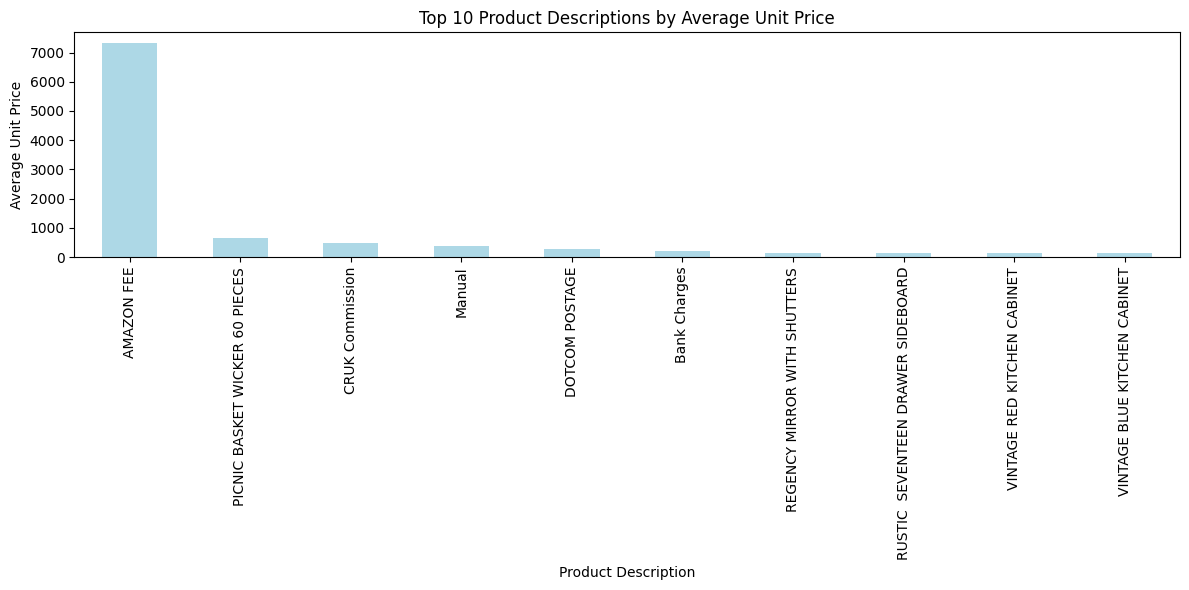

In [77]:
# Determining the top 10 product descriptions by average unit price to identify premium products or categories
# This bar chart visualizes which products tend to have higher prices on average
avg_unit_price_by_description = df.groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
avg_unit_price_by_description.plot(kind='bar', color='lightblue')
plt.title('Top 10 Product Descriptions by Average Unit Price')
plt.xlabel('Product Description')
plt.ylabel('Average Unit Price')
plt.tight_layout()  # Adjusting the layout
plt.show()

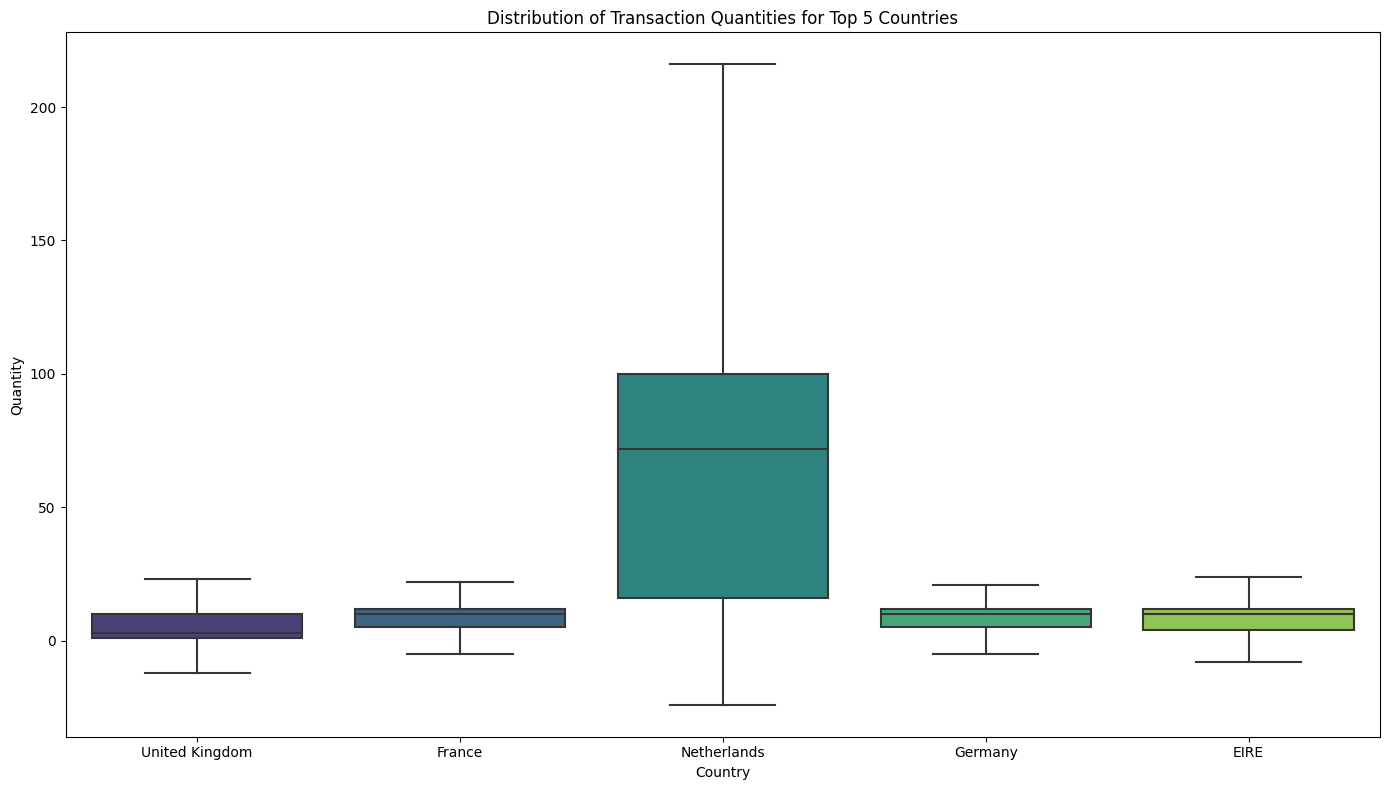

In [79]:
# Focusing on the top 5 countries by sales volume to understand where most transactions occur
# This boxplot visualizes the distribution of quantities sold in these countries, indicating market size or demand
df_top_countries = df[df['Country'].isin(top_countries)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='Quantity', data=df_top_countries, showfliers=False, palette='viridis')
plt.title('Distribution of Transaction Quantities for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.tight_layout()  # Adjusting the layout
plt.show()

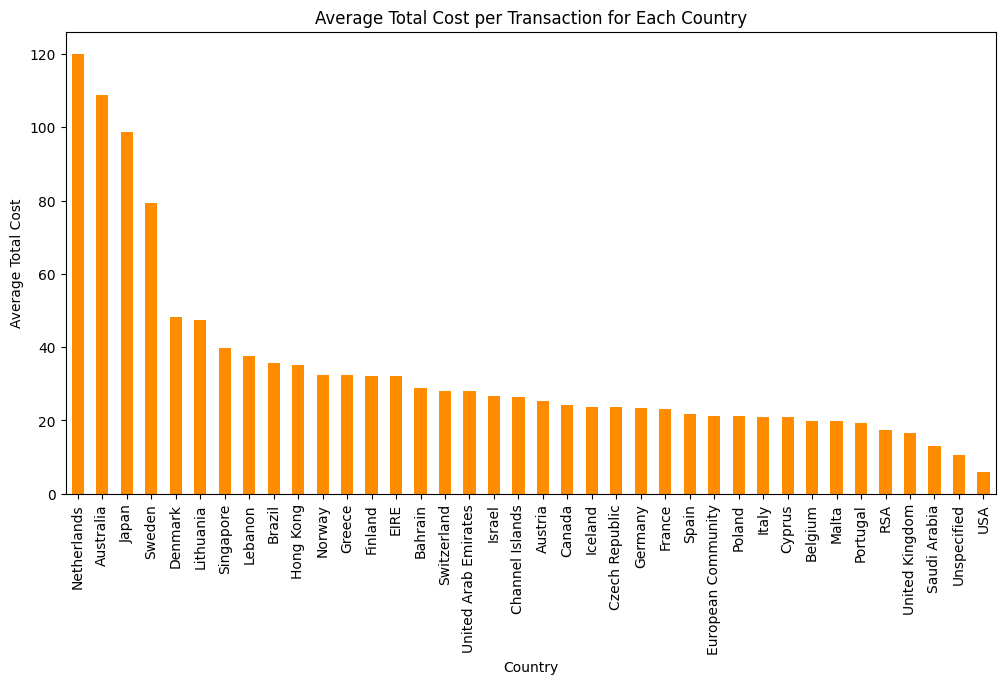

In [80]:
# Calculating the average total cost per transaction for each country
# This helps in understanding the average spending per transaction in different markets
avg_total_cost_by_country = df.groupby('Country')['TotalCost'].mean().sort_values(ascending=False)

# Visualizing the average total cost per transaction for each country
# A bar chart provides a clear comparison of average spending across countries
plt.figure(figsize=(12, 6))
avg_total_cost_by_country.plot(kind='bar', color='darkorange')
plt.title('Average Total Cost per Transaction for Each Country')
plt.xlabel('Country')
plt.ylabel('Average Total Cost')
plt.show()

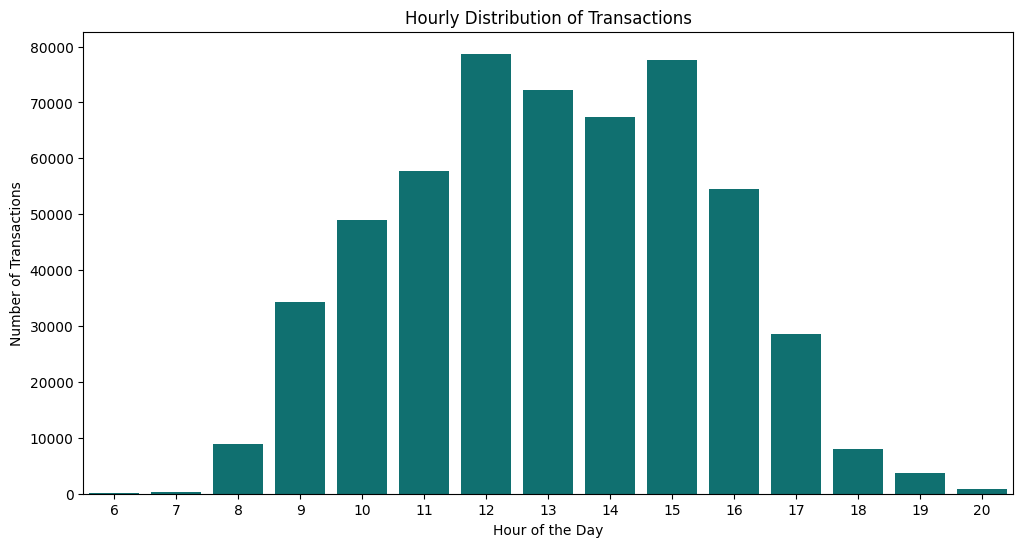

In [81]:
# Extracting the hour of day from 'InvoiceDate' and creating a new column
# This column is used to analyze transactions distribution across different hours of the day
df['HourOfDay'] = df['InvoiceDate'].dt.hour

# Visualizing the hourly distribution of transactions
# A count plot shows how transaction frequency varies throughout the day
plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=df, color='teal')
plt.title('Hourly Distribution of Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()


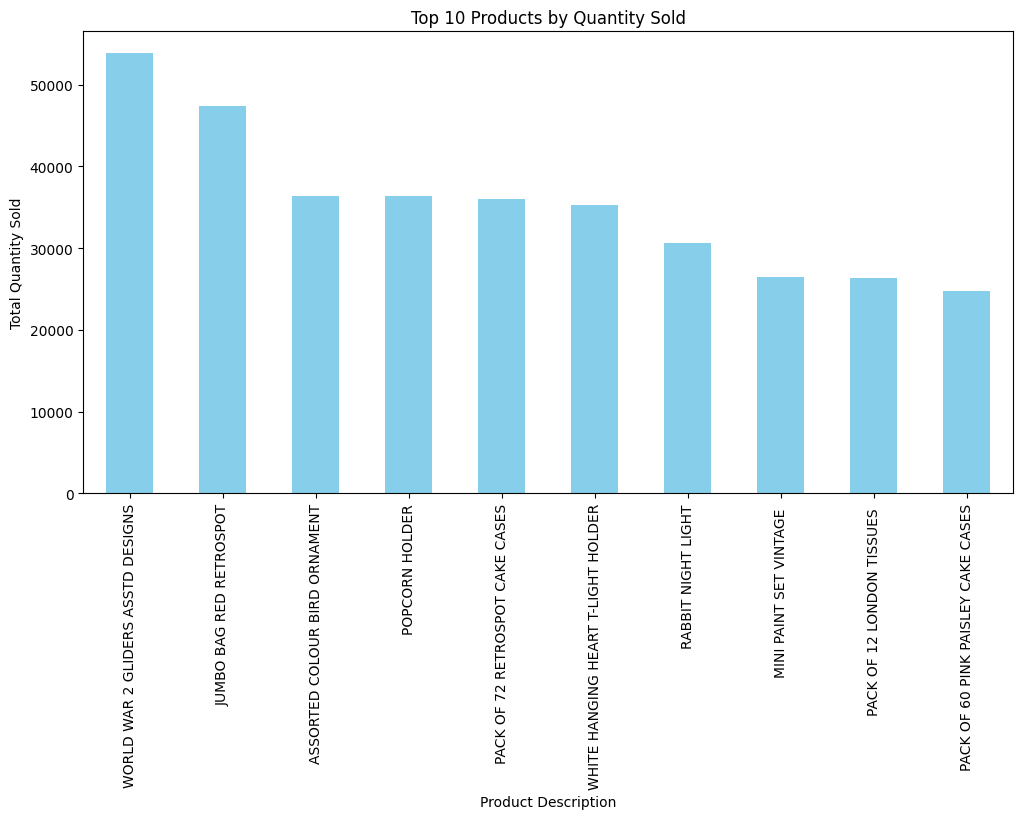

In [82]:
# Identifying the top 10 products by sales quantity
# This helps in understanding which products are the most popular or most frequently sold
top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Visualizing the top 10 products by quantity sold
# A bar chart displays the total quantity sold for each of these top products
plt.figure(figsize=(12, 6))
top_products_quantity.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()

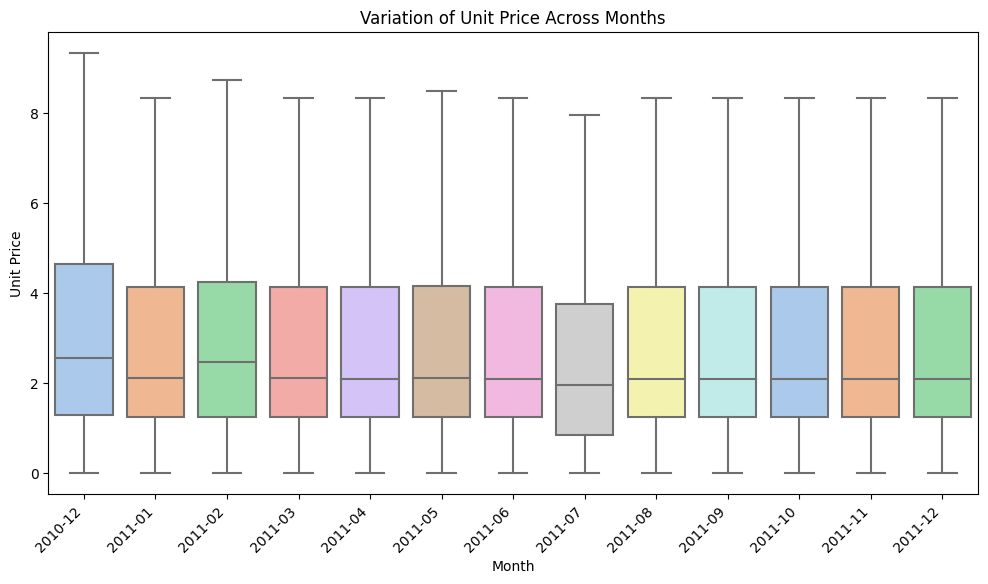

In [83]:
# Extracting the month from 'InvoiceDate' and creating a new column
# This column facilitates analyzing trends or variations across different months
df['Month'] = df['InvoiceDate'].dt.to_period("M")

# Visualizing the variation of unit price across months
# A box plot is used to display the distribution of unit prices for each month, showing median, quartiles, and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='UnitPrice', data=df, showfliers=False, palette='pastel')
plt.title('Variation of Unit Price Across Months')
plt.xlabel('Month')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


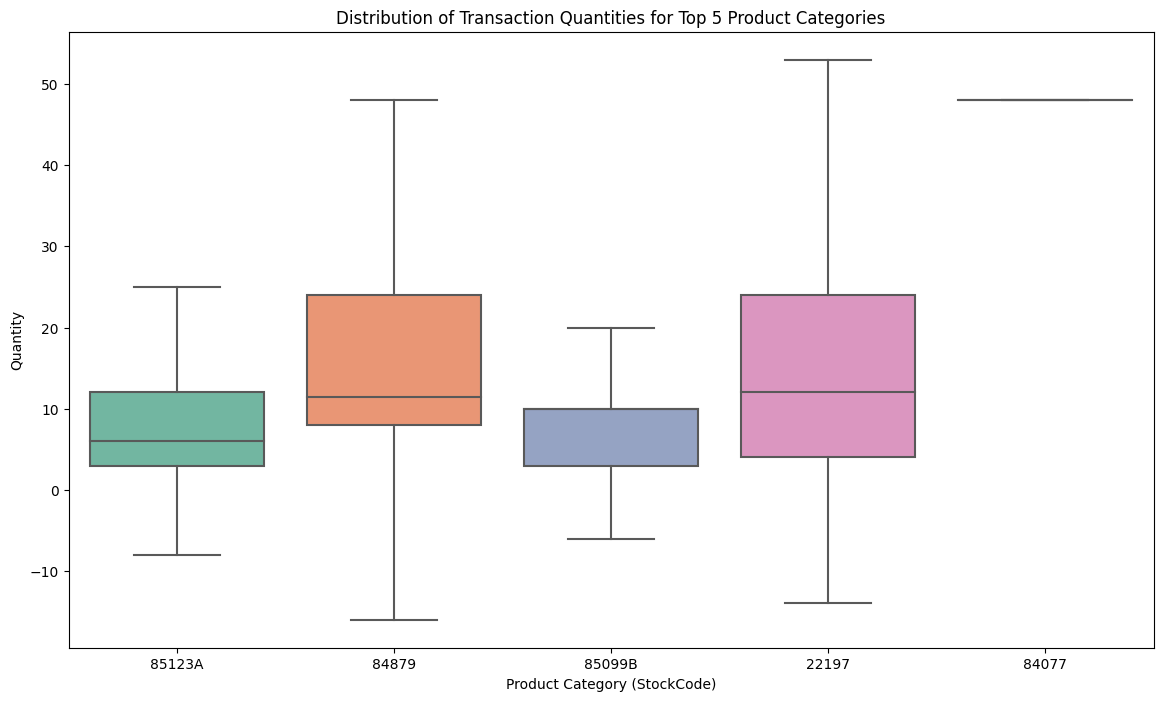

In [85]:
# Filtering the top 5 product categories with the highest sales volume
# This focuses the analysis on the most significant categories in terms of quantity sold
top_categories_quantity = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5).index
df_top_categories_quantity = df[df['StockCode'].isin(top_categories_quantity)]

# Visualizing the distribution of transaction quantities for the top 5 product categories
# A box plot shows the spread and central tendency of quantities for each top category across transactions
plt.figure(figsize=(14, 8))
sns.boxplot(x='StockCode', y='Quantity', data=df_top_categories_quantity, showfliers=False, palette='Set2')
plt.title('Distribution of Transaction Quantities for Top 5 Product Categories')
plt.xlabel('Product Category (StockCode)')
plt.ylabel('Quantity')
plt.show()

<Figure size 1400x800 with 0 Axes>

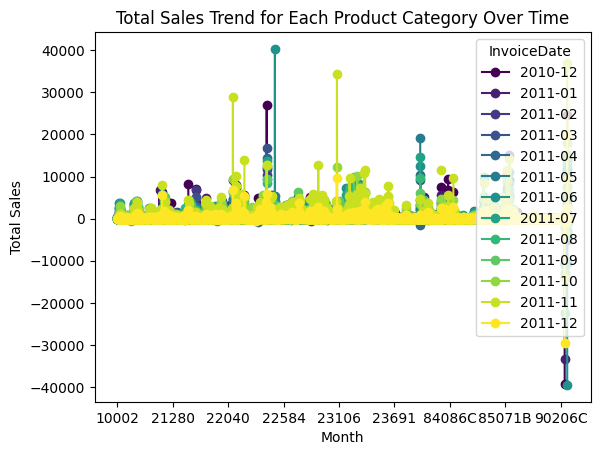

In [86]:
# Calculating the total sales trend for each product category over time
# This line plot helps in tracking how total sales for each category evolve over different months
total_sales_by_category = df.groupby(['StockCode', df['InvoiceDate'].dt.to_period("M")])['TotalCost'].sum().unstack()
plt.figure(figsize=(14, 8))
total_sales_by_category.plot(kind='line', marker='o', colormap='viridis')
plt.title('Total Sales Trend for Each Product Category Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

ValueError: Could not interpret input 'DayOfWeek'

<Figure size 1200x600 with 0 Axes>